# 双極子データの解析

## 2023/12/6 :: ohtakaで解析した双極子データ（50ps_1から50ps_5）をロードして誘電関数まで．
1206： predict_dipole_20ps_0426のノートブックをCopyして，D論用の図表作成に利用する．


# 学習結果を使って，実際の双極子モーメントの予測値との乖離をみていく．


In [2]:
#予測したモデルを使ったUnit Cellの双極子モーメントの計算
import numpy as np
#時間軸の計算用
times = []
dt = 2*10 # !! 1fs ここ重要
au2ps = 2.4189e-17 /1.0e-15/1.0e3 
au2fs = 2.4189e-17 /1.0e-15

# frames = 50001 # フレーム数
# for config in range(frames) :
#     times.append(dt * config * au2ps)
# times = np.array(times)

# cell_dipoles_pred = np.load("result_dipole.npy")


In [3]:
import numpy as np
L=12.9444
UNITCELL_VECTORS = np.array([
        [L, 0,0],
        [0, L, 0],
        [0,0, L]
    ])
TEMPERATURE=300 
TIMESTEP=dt*au2fs
print(" TIMESTEP [fs] :: ", TIMESTEP)
refractive_index = 1.329 # メタノール

 TIMESTEP [fs] ::  0.48378


In [3]:
import ml.acf_fourier
import importlib
importlib.reload(ml.acf_fourier)
FOURIER=ml.acf_fourier.dielec(UNITCELL_VECTORS, TEMPERATURE, TIMESTEP)

In [4]:
# eps0=FOURIER.calc_eps0(dipole_array)
# diel=FOURIER.calc_fourier(dipole_array,eps_n2=)

#     def calc_acf(self, dipole_array): # ACFを返す
#         return raw_calc_acf(dipole_array)
#     def calc_eps0(self, dipole_array):
#         return raw_calc_eps0(dipole_array, self.UNITCELL_VECTORS, self.TEMPERATURE)
#     def calc_fourier(self, dipole_array, eps_n2):

In [5]:
# def calc_acf(filename):
#     '''
#     filename :: *.npy
#     '''
#     # 誘電関数の計算まで
#     import statsmodels.api as sm 
#     import numpy as np
#     cell_dipoles_pred = np.load(filename)
    
#     N=int(np.shape(cell_dipoles_pred)[0]/2)
#     print("nlag :: ", N)

#     # >>>>>>>>>>>
#     eps0 = 8.8541878128e-12
#     debye = 3.33564e-30
#     nm3 = 1.0e-27
#     nm = 1.0e-9
#     A3 = 1.0e-30
#     kb = 1.38064852e-23
#     T =300 
#     # time =ms["time"].to_numpy()
#     UNITCELL_VECTORS = np.array([
#         [16.267601013183594, 0,0],
#         [0, 16.267601013183594,0],
#         [0,0, 16.267601013183594]
#     ])
#     V = np.abs(np.dot(np.cross(UNITCELL_VECTORS[:,0],UNITCELL_VECTORS[:,1]),UNITCELL_VECTORS[:,2])) * A3
#     ## V = np.abs(np.dot(np.cross(traj[0].UNITCELL_VECTOR[:,0],traj[0].UNITCELL_VECTOR[:,1]),traj[0].UNITCELL_VECTOR[:,2])) * A3
#     print("SUPERCELL VOLUME (m^3) :: ", V )
#     # V=   11.1923*11.1923*11.1923 * A3
#     kbT = kb * T 

#     # N = int(len(ms))

#     # 予測値
#     dMx_pred=cell_dipoles_pred[:,0] #-cell_dipoles_pred[0,0]
#     dMy_pred=cell_dipoles_pred[:,1] #-cell_dipoles_pred[0,1]
#     dMz_pred=cell_dipoles_pred[:,2] #-cell_dipoles_pred[0,2]

#     #自己相関関数を求める
#     acf_x_pred = sm.tsa.stattools.acf(dMx_pred,nlags=N,fft=False)
#     acf_y_pred = sm.tsa.stattools.acf(dMy_pred,nlags=N,fft=False)
#     acf_z_pred = sm.tsa.stattools.acf(dMz_pred,nlags=N,fft=False)
#     pred_data =(acf_x_pred+acf_y_pred+acf_z_pred)/3

#     time=times[:N+1]

#     # 平均値計算
#     mean_M2=(np.mean(dMx_pred**2)+np.mean(dMy_pred**2)+np.mean(dMz_pred**2))
#     mean_M=np.mean(dMx_pred)**2+np.mean(dMy_pred)**2+np.mean(dMz_pred)**2

#     # 比誘電率
#     eps_0 = 1.0 + ((mean_M2-mean_M)*debye**2)/(3.0*V*kbT*eps0)

#     # 比誘電率
#     # eps_0 = 1.0 + ((np.mean(dMx_pred**2+dMy_pred**2+dMz_pred**2))*debye**2)/(3.0*V*kbT*eps0)
#     print("EPS_0 {0}, mean_M {1}, mean_M2 {2}:: ".format(eps_0, mean_M, mean_M2))
#     return eps_0, time, pred_data


In [5]:
def load_data(filename, mode="liquid"):
    # filename=f"methanol_gas/dipole_20ps_{i}/oh_dipole.txt"
    if filename.endswith(".txt"):
        if mode == "gas":
            cell_dipoles_pred = np.loadtxt(filename)[:20000*32,1:].reshape([-1,32,3])
            cell_dipoles_pred = np.sum(cell_dipoles_pred,axis=1) # axis1について足し合わせる
        elif mode == "liquid":
            cell_dipoles_pred = np.loadtxt(filename)[:20000,1:]
        else:
            print("ERROR mode is not valid")
    elif filename.endswith(".npy"):
        cell_dipoles_pred = np.load(filename)[:20000]
    else:
        print("ERROR :: file format should be .txt or .npy")
    print("len traj NUM {}".format(len(cell_dipoles_pred[:,0])))
    print(f"MAX {np.max(cell_dipoles_pred[:,0])} {np.max(cell_dipoles_pred[:,1])} {np.max(cell_dipoles_pred[:,2])}")
    # plt.plot(cell_dipoles_pred[:,0],label="x")
    return cell_dipoles_pred


In [6]:
def acf_analysis(filename, mode="liquid"):
    # filename=f"methanol_gas/dipole_20ps_{i}/oh_dipole.txt"
    if filename.endswith(".txt"):
        if mode == "gas":
            cell_dipoles_pred = np.loadtxt(filename)[:20000*32,1:].reshape([-1,32,3])
            cell_dipoles_pred = np.sum(cell_dipoles_pred,axis=1)
        elif mode == "liquid":
            cell_dipoles_pred = np.loadtxt(filename)[:20000,1:]
        else:
            print("ERROR mode is not valid")
    elif filename.endswith(".npy"):
        cell_dipoles_pred = np.load(filename)[:20000]
    else:
        print("ERROR :: file format should be .txt or .npy")
    print("len traj NUM {}".format(len(cell_dipoles_pred[:,0])))
    print(f"MAX {np.max(cell_dipoles_pred[:,0])} {np.max(cell_dipoles_pred[:,1])} {np.max(cell_dipoles_pred[:,2])}")
    # plt.plot(cell_dipoles_pred[:,0],label="x")
    acf =FOURIER.calc_acf(cell_dipoles_pred,nlags="all",mode="all")
    return acf

In [7]:
#
# * omega^2 Psi(omega)の計算
# * データのロード

# liquidモデル
liquid_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename=f"methanol_liquid/dipole_20ps_{i}/total_dipole.txt" # liquid modelのtotal dipole
    liquid_acf.append(acf_analysis(filename,mode="liquid"))
liquid_acf_mean = np.mean(np.mean(np.array(liquid_acf),axis=0),axis=0)
liquid_fourier = ml.acf_fourier.raw_calc_only_acffourier(liquid_acf_mean, TIMESTEP)

# gas モデル
gas_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename=f"methanol_gas/dipole_20ps_{i}/total_dipole.txt" # gas modelのtotal dipole
    gas_acf.append(acf_analysis(filename,mode="gas"))
gas_acf_mean = np.mean(np.mean(np.array(gas_acf),axis=0),axis=0)
gas_fourier = ml.acf_fourier.raw_calc_only_acffourier(gas_acf_mean, TIMESTEP)

# CH3COがgas,O-OHがliquid
OOHliquid_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename=f"methanol_ch3gas_oh_liquid/tota_dipole_ch3gas_ohliquid_{i}.npy" # ch3をgasで，ohをliquidで計算
    OOHliquid_acf.append(acf_analysis(filename,mode="gas"))
OOHliquid_acf_mean = np.mean(np.mean(np.array(OOHliquid_acf),axis=0),axis=0)
OOHliquid_fourier = ml.acf_fourier.raw_calc_only_acffourier(OOHliquid_acf_mean, TIMESTEP)

# CH3COがgas,O-OHがliquid
OOHgas_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename=f"methanol_ch3liquid_oh_gas/tota_dipole_ch3liquid_ohgas_{i}.npy" # ch3をliquidで，ohをgasで計算
    OOHgas_acf.append(acf_analysis(filename,mode="gas"))
OOHgas_acf_mean = np.mean(np.mean(np.array(OOHgas_acf),axis=0),axis=0)
OOHgas_fourier = ml.acf_fourier.raw_calc_only_acffourier(OOHgas_acf_mean, TIMESTEP)


len traj NUM 40000
MAX 7.35465 5.68093 -16.4573
len traj NUM 40000
MAX -9.18613 8.71197 13.7493
len traj NUM 40000
MAX 21.2484 3.14017 15.1234
len traj NUM 40000
MAX 9.35417 -8.51717 -1.51696
len traj NUM 40000
MAX 42.722 -1.81206 13.4674
len traj NUM 40000
MAX 16.8395 -9.74055 14.3269
len traj NUM 40000
MAX 4.33591 35.0926 22.2033
len traj NUM 40000
MAX 19.2501 28.3739 -2.8459
len traj NUM 40000
MAX 11.4911 17.8934 -1.8119
len traj NUM 40000
MAX -5.02645 25.0751 13.277
len traj NUM 40000
MAX 7.389205700000001 4.1674489 -9.020805200000002
len traj NUM 40000
MAX -4.1517463 6.591066 10.2963753
len traj NUM 40000
MAX 13.743658500000002 4.453778199999999 10.1022742
len traj NUM 40000
MAX 6.769366400000001 -3.3775928700000013 -0.13325929999999997
len traj NUM 40000
MAX 28.38129480000001 2.0874351000000004 8.3678753
len traj NUM 40000
MAX 7.542043900000003 -4.005620509999998 10.200207619999999
len traj NUM 40000
MAX 5.3240641 20.833273299999995 14.017918400000001
len traj NUM 40000
MAX 13.28

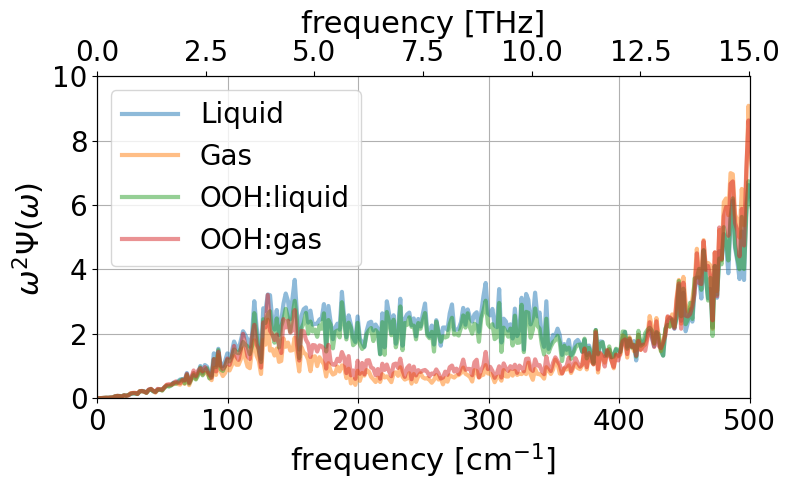

In [8]:
#
#
# * omega^2 Psi(omega)の計算
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:]-0.0095*diel_mean[0,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:]-0.0095*cpmd_diel_mean[0,:], alpha=0.5, label="CPMD", lw=3)  # 描画

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:], alpha=0.5, label="CPMD", lw=3)  # 描画

ax.plot(liquid_fourier[0]*33.3, liquid_fourier[1]*liquid_fourier[0]*liquid_fourier[0], alpha=0.5, label="Liquid", lw=3)  # 描画
ax.plot(gas_fourier[0]*33.3, gas_fourier[1]*gas_fourier[0]*gas_fourier[0], alpha=0.5, label="Gas", lw=3)  # 描画
ax.plot(OOHliquid_fourier[0]*33.3, OOHliquid_fourier[1]*OOHliquid_fourier[0]*OOHliquid_fourier[0], alpha=0.5, label="OOH:liquid", lw=3)  # 描画
ax.plot(OOHgas_fourier[0]*33.3, OOHgas_fourier[1]*OOHgas_fourier[0]*OOHgas_fourier[0], alpha=0.5, label="OOH:gas", lw=3)  # 描画


# exp
# ax.scatter(expdata_eps1[:,0], expdata_eps1[:,1], label="Exp.", lw=3)  # 描画
# ax.scatter(expdata_eps2[:,0], expdata_eps2[:,1], label="Exp.", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel=r'frequency [$\mathrm{cm}^{-1}$]'
ylabel=r'$\omega^2 \Psi(\omega)$ '
# title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,10)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper left",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


# pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("dielec_func_IR_0427_for_shorttalk2.pdf", transparent=True)
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



In [10]:
#
# * omega^2 Psi(omega)の計算
# * データのロード

import numpy as np
import ml.acf_fourier
import importlib
importlib.reload(ml.acf_fourier)
FOURIER=ml.acf_fourier.dielec(UNITCELL_VECTORS, TEMPERATURE, TIMESTEP)

eps_inf = refractive_index**2

# liquidモデル
liquid_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename=f"methanol_liquid/dipole_20ps_{i}/total_dipole.txt" # liquid modelのtotal dipole
    liquid_acf.append(acf_analysis(filename,mode="liquid"))
liquid_acf_mean = np.mean(np.mean(np.array(liquid_acf),axis=0),axis=0)
liquid_fourier = ml.acf_fourier.raw_calc_acffourier_with_amplitude(liquid_acf_mean, TIMESTEP,eps_inf,UNITCELL_VECTORS, TEMPERATURE)


# gas モデル
gas_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename=f"methanol_gas/dipole_20ps_{i}/total_dipole.txt" # gas modelのtotal dipole
    gas_acf.append(acf_analysis(filename,mode="gas"))
gas_acf_mean = np.mean(np.mean(np.array(gas_acf),axis=0),axis=0)
gas_fourier = ml.acf_fourier.raw_calc_acffourier_with_amplitude(gas_acf_mean, TIMESTEP,eps_inf,UNITCELL_VECTORS, TEMPERATURE)


# liquid-gas
# liquidモデル
liquid_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename_gas=f"methanol_gas/dipole_20ps_{i}/total_dipole.txt" # gas modelのtotal dipole
    filename_liquid=f"methanol_liquid/dipole_20ps_{i}/total_dipole.txt" # liquid modelのtotal dipole
    data_gas = load_data(filename_gas, mode="gas")
    data_liquid = load_data(filename_liquid, mode="liquid")
    print("data_gas/data_liquid :: ", data_gas.shape, data_liquid.shape)
    liquid_acf.append(FOURIER.calc_acf(data_liquid-data_gas,nlags="all",mode="all"))
liquid_gas_acf_mean = np.mean(np.mean(np.array(liquid_acf),axis=0),axis=0)
liquid_gas_fourier = ml.acf_fourier.raw_calc_acffourier_with_amplitude(liquid_gas_acf_mean, TIMESTEP,eps_inf,UNITCELL_VECTORS, TEMPERATURE)

# cross correlationの計算
liquid_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename_gas=f"methanol_gas/dipole_20ps_{i}/total_dipole.txt" # gas modelのtotal dipole
    filename_liquid=f"methanol_liquid/dipole_20ps_{i}/total_dipole.txt" # liquid modelのtotal dipole
    data_gas = load_data(filename_gas, mode="gas")
    data_liquid = load_data(filename_liquid, mode="liquid")
    print("data_gas/data_liquid :: ", data_gas.shape, data_liquid.shape)
    liquid_acf.append(ml.acf_fourier.calc_cross_acf(data_liquid-data_gas,data_gas,engine="tsa"))
liquid_gas_acf_mean = np.mean(np.mean(np.array(liquid_acf),axis=0),axis=0)
liquid_gas_cross_fourier = ml.acf_fourier.raw_calc_acffourier_with_amplitude(liquid_gas_acf_mean, TIMESTEP,eps_inf,UNITCELL_VECTORS, TEMPERATURE)


# CH3COがgas,O-OHがliquid
OOHliquid_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename=f"methanol_ch3gas_oh_liquid/tota_dipole_ch3gas_ohliquid_{i}.npy" # ch3をgasで，ohをliquidで計算
    OOHliquid_acf.append(acf_analysis(filename,mode="gas"))
OOHliquid_acf_mean = np.mean(np.mean(np.array(OOHliquid_acf),axis=0),axis=0)
OOHliquid_fourier = ml.acf_fourier.raw_calc_acffourier_with_amplitude(OOHliquid_acf_mean, TIMESTEP,eps_inf,UNITCELL_VECTORS, TEMPERATURE)

# CH3COがgas,O-OHがliquid
OOHgas_acf = []
for i in [1,2,3,4,5,6,7,8,9,10]: # 
    filename=f"methanol_ch3liquid_oh_gas/tota_dipole_ch3liquid_ohgas_{i}.npy" # ch3をliquidで，ohをgasで計算
    OOHgas_acf.append(acf_analysis(filename,mode="gas"))
OOHgas_acf_mean = np.mean(np.mean(np.array(OOHgas_acf),axis=0),axis=0)
OOHgas_fourier = ml.acf_fourier.raw_calc_acffourier_with_amplitude(OOHgas_acf_mean, TIMESTEP,eps_inf,UNITCELL_VECTORS, TEMPERATURE)


len traj NUM 20000
MAX 3.79927 2.85186 -16.4573
len traj NUM 20000
MAX -9.18613 8.71197 13.7493
len traj NUM 20000
MAX 21.2484 3.14017 15.1234
len traj NUM 20000
MAX 9.35417 -8.51717 -1.51696
len traj NUM 20000
MAX 42.722 -1.82908 13.4674
len traj NUM 20000
MAX 16.8395 -13.5383 14.3269
len traj NUM 20000
MAX -3.36708 35.0926 22.2033
len traj NUM 20000
MAX 19.2501 28.3739 -2.8459
len traj NUM 20000
MAX 11.4911 14.2827 -5.233
len traj NUM 20000
MAX -5.02645 25.0751 10.9364
fft_data ::  (20000,)
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
len traj NUM 20000
MAX 3.4185037 2.3304532 -9.020805200000002
len traj NUM 20000
MAX -4.1517463 6.591066 9.1481751
len traj NUM 20000
MAX 13.743658500000002 4.453778199999999 10.1022742
len traj NUM 20000
MAX 6.769366400000001 -3.3775928700000013 -0.13325929999999997
len traj NUM 20000
MAX 28.38129480000001 -0.15662640000000017 8.3678753
len traj NUM 20000
MAX 7.542043900000003 -6.811555 9.5996381
len traj NUM 20000
MAX 0.13815730000000026 20.833273

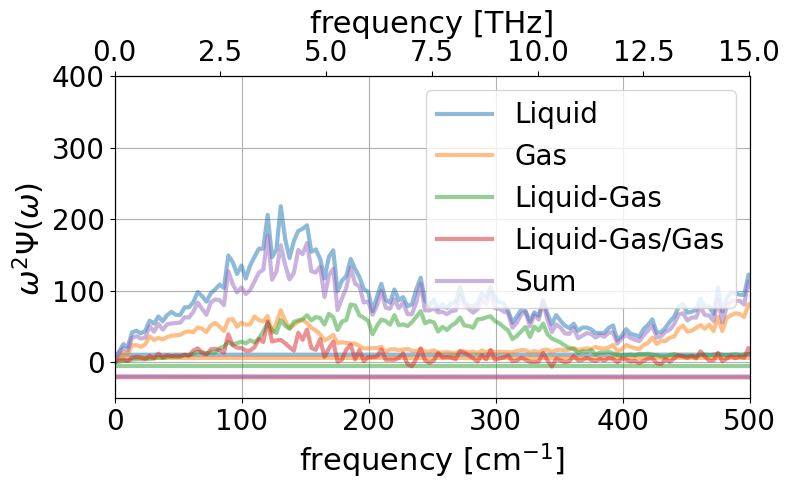

In [14]:
#
#
# * omega^2 Psi(omega)の計算
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:]-0.0095*diel_mean[0,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:]-0.0095*cpmd_diel_mean[0,:], alpha=0.5, label="CPMD", lw=3)  # 描画

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:], alpha=0.5, label="CPMD", lw=3)  # 描画

ax.plot(liquid_fourier[0]*33.3, liquid_fourier[2]*liquid_fourier[0]*400*3.14/3, alpha=0.5, label="Liquid", lw=3)  # 描画
ax.plot(gas_fourier[0]*33.3, gas_fourier[2]*gas_fourier[0]*400*3.14/3, alpha=0.5, label="Gas", lw=3)  # 描画
# ax.plot(OOHliquid_fourier[0]*33.3, OOHliquid_fourier[2]*OOHliquid_fourier[0]*400*3.14/3, alpha=0.5, label="OOH:liquid", lw=3)  # 描画
# ax.plot(OOHgas_fourier[0]*33.3, OOHgas_fourier[2]*OOHgas_fourier[0]*400*3.14/3, alpha=0.5, label="OOH:gas", lw=3)  # 描画

ax.plot(liquid_gas_fourier[0]*33.3, liquid_gas_fourier[2]*liquid_gas_fourier[0]*400*3.14/3, alpha=0.5, label="Liquid-Gas", lw=3)  # 描画
ax.plot(liquid_gas_cross_fourier[0]*33.3, liquid_gas_cross_fourier[2]*liquid_gas_cross_fourier[0]*400*3.14/3, alpha=0.5, label="Liquid-Gas/Gas", lw=3)  # 描画

ax.plot(gas_fourier[0]*33.3, (gas_fourier[2]+liquid_gas_fourier[2]+liquid_gas_cross_fourier[2])*gas_fourier[0]*400*3.14/3, alpha=0.5, label="Sum", lw=3)  # 描画



# exp
# ax.scatter(expdata_eps1[:,0], expdata_eps1[:,1], label="Exp.", lw=3)  # 描画
# ax.scatter(expdata_eps2[:,0], expdata_eps2[:,1], label="Exp.", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel=r'frequency [$\mathrm{cm}^{-1}$]'
ylabel=r'$\omega^2 \Psi(\omega)$ '
# title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(-50,400)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


# pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("dielec_func_IR_0427_for_shorttalk2.pdf", transparent=True)
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



len traj NUM 40000
MAX 2.912967220000001 3.46538694 6.516165900000002
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 1.0660347380964135, mean_M 21.788190384587576, mean_M2 23.204421913993514:: 
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 1.0660347380964135, mean_M 21.788190384587576, mean_M2 23.204421913993514:: 
len traj NUM 40000
MAX 5.701537 3.4326895400000006 1.2609880400000002
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 1.057460893860152, mean_M 13.997906711396988, mean_M2 15.230257015774361:: 
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 1.057460893860152, mean_M 13.997906711396988, mean_M2 15.230257015774361:: 
len traj NUM 40000
MAX 0.7652164 3.5519899799999997 1.3961806399999996
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 1.0587848352669145, mean_M 4.0539927521159385, mean_M2 5.314737317111196:: 
SUPERCELL VOLUME (m^3) ::  2.168931191160384e-27
EPS_0 1.0587848352669145, mean_M 4.0539927521159385, mean_M2 5.314737317111196:: 
l

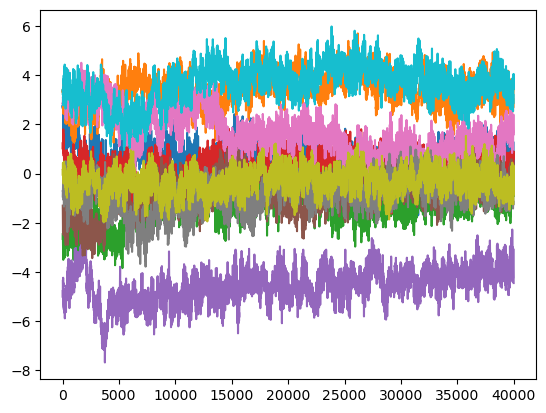

In [209]:
# 誘電関数の計算まで
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt

# 機械学習によるもの
eps_list=[]
acf_list=[]
diel_list=[]

# 元々のもの
cpmd_eps_list=[]
cpmd_diel_list=[]

refractive_index = 1.329

LENGTH_USE = 40000*32 # gas model
LENGTH_USE = 40000*32


for i in [1,2,3,4,5,6,7,8,9,10]: # 
    # 機械学習によるもの
    filename=f"methanol_ch3gas_oh_liquid/tota_dipole_ch3gas_ohliquid_{i}.npy"
    filename=f"methanol_liquid/dipole_20ps_{i}/total_dipole.txt" # liquid modelのtotal dipole
    # filename=f"methanol_gas/dipole_20ps_{i}/total_dipole.txt" # gas modelのtotal dipole
    # filename=f"methanol_ch3gas_oh_liquid/tota_dipole_ch3gas_ohliquid_{i}.npy" # ch3をgasで，ohをliquidで計算
    # filename=f"methanol_ch3liquid_oh_gas/tota_dipole_ch3liquid_ohgas_{i}.npy" # ch3をgasで，ohをliquidで計算
    # filename=f"methanol_ch3ohliquid_cogas/total_dipole_ch3ohliquid_cogas_{i}.npy" # CH3,OHをliquid，O，COをgasで計算
    filename=f"methanol_o_liquid/total_dipole_o_liquid_{i}.npy" # Oをliquid，CH3, OH，COをgasで計算
    filename=f"methanol_oh_liquid/total_dipole_oh_liquid_{i}.npy" # Oをliquid，CH3, OH，COをgasで計算
    # 以下1種類のボンドだけ直接調べる場合
    # filename=f"methanol_gas/dipole_20ps_{i}/oh_dipole.txt"
    if filename.endswith(".txt"):
        # cell_dipoles_pred = np.loadtxt(filename)[:LENGTH_USE,1:].reshape([-1,32,3])
        # cell_dipoles_pred = np.sum(cell_dipoles_pred,axis=1)
        # cell_dipoles_pred = np.loadtxt(filename)[:LENGTH_USE,1:]
        cell_dipoles_pred = np.loadtxt(filename)[:40000*32,2:].reshape([-1,32,3])
        cell_dipoles_pred = np.sum(cell_dipoles_pred,axis=1)
    elif filename.endswith(".npy"):
        cell_dipoles_pred = np.load(filename)[:LENGTH_USE]
    else:
        print("ERROR :: file format should be .txt or .npy")
    print("len traj NUM {}".format(len(cell_dipoles_pred[:,0])))
    print(f"MAX {np.max(cell_dipoles_pred[:,0])} {np.max(cell_dipoles_pred[:,1])} {np.max(cell_dipoles_pred[:,2])}")
    plt.plot(cell_dipoles_pred[:,0],label="x")
    acf =FOURIER.calc_acf(cell_dipoles_pred)
    eps0=FOURIER.calc_eps0(cell_dipoles_pred)
    diel=FOURIER.calc_fourier(cell_dipoles_pred,eps_n2=refractive_index**2) #,window="hann")   # eps_n2=eps_inf^2 ? (3.1) 
    # print(np.shape(np.array(cell_dipoles_pred)))
    acf_list.append(acf)
    eps_list.append(eps0)
    diel_list.append(diel)
    # print(diel_list)



In [ ]:
def 

In [210]:
#
# * 平均値を計算
if len(diel_list) == 1:
    print("len(diel_list) = 1")
    diel_mean = np.array(diel_list[0])
    eps0_mean = eps_list[0]
    print("eps_0 :: {}".format(eps0_mean))
else:
    print("len(diel_list) = ", len(diel_list))    
    diel_mean = np.mean(np.array(diel_list), axis = 0)
    eps0_mean = np.mean(np.array(eps_list))
    print("eps_0 :: {}".format(eps0_mean))
    



len(diel_list) =  10
eps_0 :: 1.0644901786856111


In [211]:
diel_list[0]
# eps_list
# len(diel_list)
# diel_mean

(array([ 0.00000000e+00,  5.16763818e-02,  1.03352764e-01, ...,
         1.03342428e+03,  1.03347596e+03, -1.03352764e+03]),
 array([1.83227574, 1.83470815, 1.82547446, ..., 1.83227599, 1.83228946,
        1.83227574]),
 array([-0.00000000e+00,  1.93299169e-02,  1.47134702e-02, ...,
        -8.65395192e-05, -8.89350385e-05, -0.00000000e+00]))

In [212]:
expdata_eps1=np.loadtxt("../07_メタノール誘電関数/ir_dielec_imag/exp_im_eps_1.csv", delimiter=",")
expdata_eps2=np.loadtxt("../07_メタノール誘電関数/ir_dielec_imag/exp_im_eps_2.csv", delimiter=",")

FileNotFoundError: ../07_メタノール誘電関数/ir_dielec_imag/exp_im_eps_1.csv not found.

In [213]:
np.shape(np.array(diel_list))

(10, 3, 20001)

In [214]:
np.shape(diel_mean)

(3, 20001)

In [215]:
#
#
# * 誘電関数データの保存（機械学習）

import pandas as pd

data_df2 = pd.DataFrame()
print("The DataFrame generated from the NumPy array is:")
print(data_df2)

data_df2["freq_kayser"] = diel_mean[0,:]*33.3
data_df2["real_diel"]   = diel_mean[1,:]
data_df2["imag_diel"]   = diel_mean[2,:]

# !! 重要，ファイルを上書きしないこと !!
# data_df2.to_csv('met_32mol_pred_dielec_cpmd_300K_1222.csv')

print("The DataFrame generated from the NumPy array is:")
print(data_df2)

The DataFrame generated from the NumPy array is:
Empty DataFrame
Columns: []
Index: []
The DataFrame generated from the NumPy array is:
        freq_kayser  real_diel  imag_diel
0          0.000000   1.830731   0.000000
1          1.720824   1.821371   0.021109
2          3.441647   1.812107   0.017140
3          5.162471   1.809568   0.017445
4          6.883294   1.802623   0.017575
...             ...        ...        ...
19996  34409.587002   1.830695  -0.000007
19997  34411.307826   1.830713  -0.000004
19998  34413.028649   1.830708   0.000003
19999  34414.749473   1.830721  -0.000010
20000 -34416.470296   1.830731   0.000000

[20001 rows x 3 columns]


In [216]:
# refractive indexとalphaの計算
import cpmd.dipole_core
pred_refractive=cpmd.dipole_core.raw_calculate_refractiveindex_pandas(data_df2)

# pred_refractive.to_csv('met_32mol_pred_refractive_cpmd_300K_1222.csv')


The DataFrame generated from the NumPy array is:


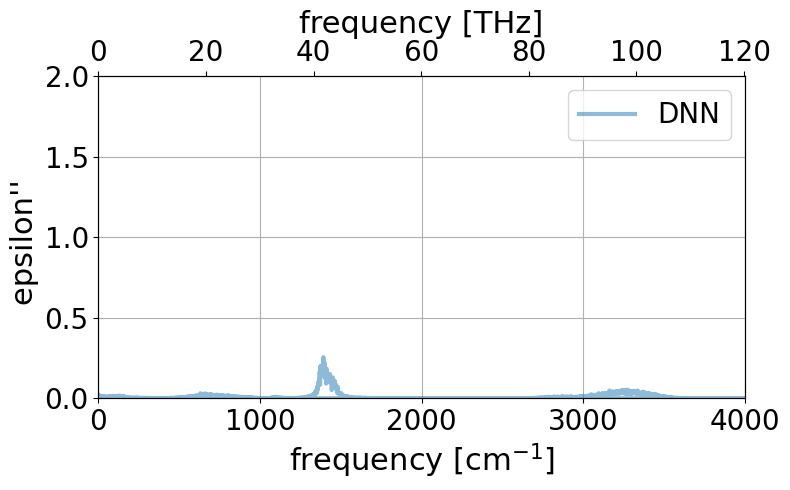

In [217]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:]-0.0095*diel_mean[0,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:]-0.0095*cpmd_diel_mean[0,:], alpha=0.5, label="CPMD", lw=3)  # 描画

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:], alpha=0.5, label="CPMD", lw=3)  # 描画

ax.plot(data_df2["freq_kayser"], data_df2["imag_diel"], alpha=0.5, label="DNN", lw=3)  # 描画

# exp
# ax.scatter(expdata_eps1[:,0], expdata_eps1[:,1], label="Exp.", lw=3)  # 描画
# ax.scatter(expdata_eps2[:,0], expdata_eps2[:,1], label="Exp.", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel=r'frequency [$\mathrm{cm}^{-1}$]'
ylabel="epsilon'' "
# title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_title(title,fontsize=22 )

XMAX=4000

ax.set_xlim(0,XMAX)
ax.set_ylim(0,2)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


# pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("dielec_func_IR_0427_for_shorttalk2.pdf", transparent=True)
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



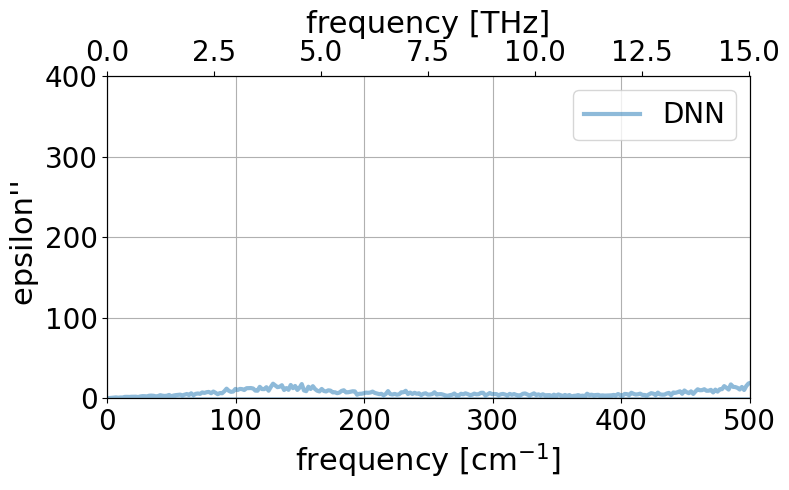

In [218]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:]-0.0095*diel_mean[0,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:]-0.0095*cpmd_diel_mean[0,:], alpha=0.5, label="CPMD", lw=3)  # 描画

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:], alpha=0.5, label="CPMD", lw=3)  # 描画

# やっぱり1.5倍くらいするとそれっぽくなる．
ax.plot(pred_refractive["freq_kayser"], pred_refractive["alpha"]*1.8, alpha=0.5, label="DNN", lw=3)  # 描画

# exp
# ax.scatter(expdata_eps1[:,0], expdata_eps1[:,1], label="Exp.", lw=3)  # 描画
# ax.scatter(expdata_eps2[:,0], expdata_eps2[:,1], label="Exp.", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel=r'frequency [$\mathrm{cm}^{-1}$]'
ylabel="epsilon'' "
# title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,400)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


# pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("dielec_func_IR_0427_for_shorttalk2.pdf", transparent=True)
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



In [219]:
importlib.reload(ml.acf_fourier)

print(np.array(acf_list).shape)
acf_mean = np.mean(np.array(acf_list),axis=0)
acf_mean = np.mean(acf_mean,axis=0)
print(acf_mean.shape)
acfdata = ml.acf_fourier.raw_calc_only_acffourier(acf_mean, TIMESTEP)

(10, 3, 40000)
(40000,)


In [220]:
len(acfdata[0])

20001

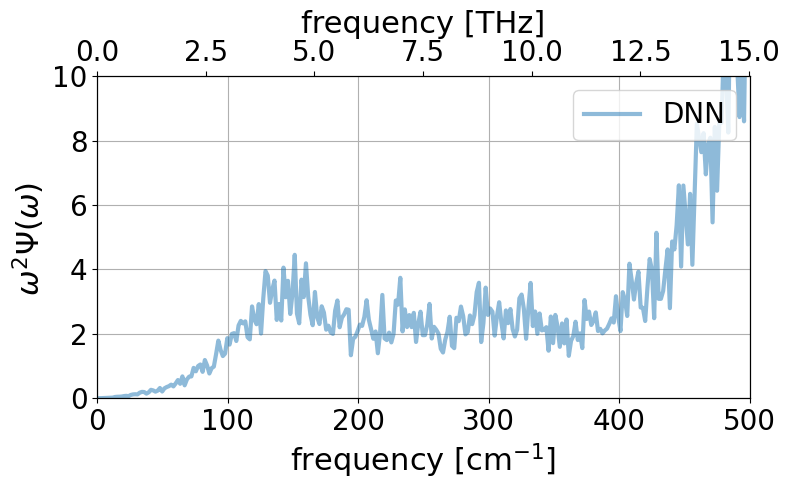

In [221]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:]-0.0095*diel_mean[0,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:]-0.0095*cpmd_diel_mean[0,:], alpha=0.5, label="CPMD", lw=3)  # 描画

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:], alpha=0.5, label="CPMD", lw=3)  # 描画

ax.plot(acfdata[0]*33.3, acfdata[1]*acfdata[0]*acfdata[0], alpha=0.5, label="DNN", lw=3)  # 描画

# exp
# ax.scatter(expdata_eps1[:,0], expdata_eps1[:,1], label="Exp.", lw=3)  # 描画
# ax.scatter(expdata_eps2[:,0], expdata_eps2[:,1], label="Exp.", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel=r'frequency [$\mathrm{cm}^{-1}$]'
ylabel=r'$\omega^2 \Psi(\omega)$ '
# title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,10)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


# pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("dielec_func_IR_0427_for_shorttalk2.pdf", transparent=True)
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



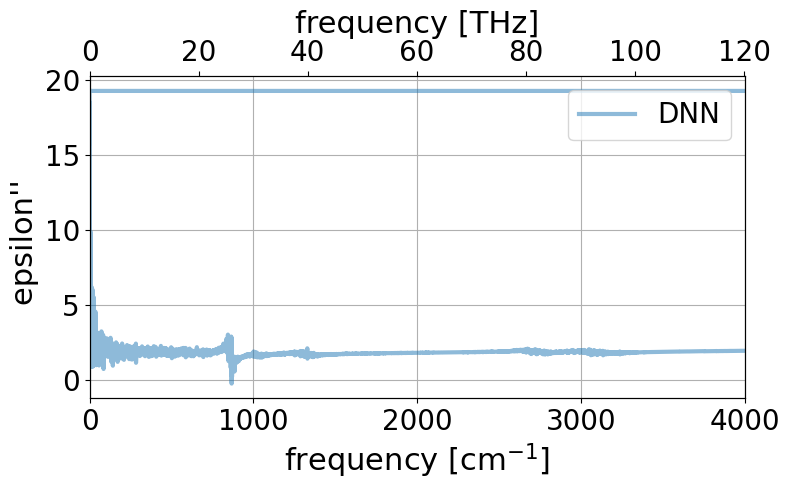

In [54]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:]-0.0095*diel_mean[0,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:]-0.0095*cpmd_diel_mean[0,:], alpha=0.5, label="CPMD", lw=3)  # 描画

# ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:],alpha=0.5, label="DNN", lw=3)  # 描画
# ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:], alpha=0.5, label="CPMD", lw=3)  # 描画

ax.plot(data_df2["freq_kayser"], data_df2["real_diel"], alpha=0.5, label="DNN", lw=3)  # 描画

# exp
# ax.scatter(expdata_eps1[:,0], expdata_eps1[:,1], label="Exp.", lw=3)  # 描画
# ax.scatter(expdata_eps2[:,0], expdata_eps2[:,1], label="Exp.", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel=r'frequency [$\mathrm{cm}^{-1}$]'
ylabel="epsilon'' "
# title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_title(title,fontsize=22 )

XMAX=4000

ax.set_xlim(0,XMAX)
# ax.set_ylim(0,2)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


# pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("dielec_func_IR_0427_for_shorttalk2.pdf", transparent=True)
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



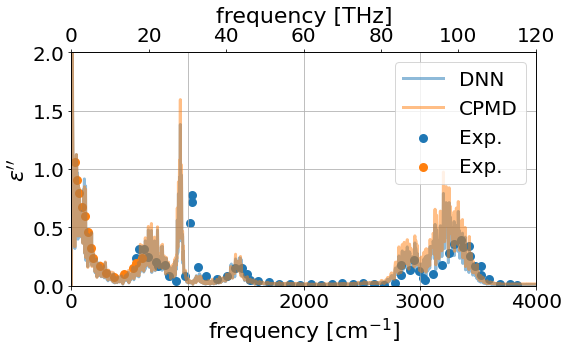

In [24]:

#
# * 2023/05/01 abstract用
# 
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(diel_mean[0,:]*33.3, diel_mean[2,:]-0.0095*diel_mean[0,:], label="DNN", lw=3)  # 描画
ax.plot(cpmd_diel_mean[0,:]*33.3, cpmd_diel_mean[2,:]-0.0095*cpmd_diel_mean[0,:], alpha=0.5, label="CPMD", lw=3)  # 描画

# exp
# ax.scatter(expdata_eps1[:,0], expdata_eps1[:,1], label="Exp.", lw=3)  # 描画
# ax.scatter(expdata_eps2[:,0], expdata_eps2[:,1], label="Exp.", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel=r'frequency [$\mathrm{cm}^{-1}$]'
ylabel=r"$\epsilon''$ "
# title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_title(title,fontsize=22 )

XMAX=4000

ax.set_xlim(0,XMAX)
ax.set_ylim(0,2)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


# pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
fig.savefig("dielec_func_IR_0501_for_abst.pdf", transparent=True)
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



In [103]:
# 並び替え
dipole_x=dipole_x.reshape(-1)
dipole_y=dipole_y.reshape(-1)
dipole_z=dipole_z.reshape(-1)

#
# >>>>>>>>>>>
eps0 = 8.8541878128e-12
debye = 3.33564e-30
nm3 = 1.0e-27
nm = 1.0e-9
A3 = 1.0e-30
kb = 1.38064852e-23
T =300 
# time =ms["time"].to_numpy()
UNITCELL_VECTORS = np.array([
    [16.267601013183594, 0,0],
    [0, 16.267601013183594,0],
    [0,0, 16.267601013183594]
    ])
V = np.abs(np.dot(np.cross(UNITCELL_VECTORS[:,0],UNITCELL_VECTORS[:,1]),UNITCELL_VECTORS[:,2])) * A3
## V = np.abs(np.dot(np.cross(traj[0].UNITCELL_VECTOR[:,0],traj[0].UNITCELL_VECTOR[:,1]),traj[0].UNITCELL_VECTOR[:,2])) * A3
print("SUPERCELL VOLUME (m^3) :: ", V )
# V=   11.1923*11.1923*11.1923 * A3
kbT = kb * T 

# N = int(len(ms))

# 予測値
dMx_pred=dipole_x-np.mean(dipole_x)
dMy_pred=dipole_y-np.mean(dipole_y)
dMz_pred=dipole_z-np.mean(dipole_z)

dM_pred=np.sqrt(dipole_x**2+dipole_y**2+dipole_z**2)-np.mean(np.sqrt(dipole_x**2+dipole_y**2+dipole_z**2))


mean_M2=np.mean(dipole_x**2+dipole_y**2+dipole_z**2)
mean_M=np.mean(np.sqrt(dipole_x**2+dipole_y**2+dipole_z**2))

# 比誘電率
eps_0 = 1.0 + ((mean_M2-mean_M**2)*debye**2)/(3.0*V*kbT*eps0)
print(eps_0)

# 比誘電率
eps_0 = 1.0 + ((np.mean(dM_pred**2))*debye**2)/(3.0*V*kbT*eps0)
print(eps_0)

SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
2.056936680492596
2.0569324544495293


In [52]:
eps_0 = 0
pred=[]
eps_list=[]
NUM_TRAJ = 50
for i in range(1,NUM_TRAJ+1):
    print(i)
    eps_0_tmp, time, pred_data = calc_acf("result_dipole_"+str(i)+".npy")
    pred.append(pred_data)
    eps_list.append(eps_0_tmp)
    eps_0 = eps_0+eps_0_tmp

print("eps_0 :: {}".format(eps_0))
    

1
nlag ::  25000
SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
EPS_0 4.319007988500058, mean_M 309.00347535242463, mean_M2 450.2880859375:: 
2
nlag ::  25000
SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
EPS_0 4.166986666193656, mean_M 548.2053592208731, mean_M2 683.0186767578125:: 
3
nlag ::  25000
SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
EPS_0 4.475124345796857, mean_M 505.99842748895617, mean_M2 653.9286499023438:: 
4
nlag ::  25000
SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
EPS_0 4.404892106801945, mean_M 451.5676861046088, mean_M2 596.5082397460938:: 
5
nlag ::  25000
SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
EPS_0 4.216787469282888, mean_M 452.7087134675403, mean_M2 589.6419677734375:: 
6
nlag ::  25000
SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
EPS_0 3.9990890922561873, mean_M 533.0483395239253, mean_M2 660.7145385742188:: 
7
nlag ::  25000
SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
EPS_0 5.044921478701693, mean_M 417.01802032037995,

In [54]:

pred_mean = np.mean(np.array(pred), axis = 0)
print(np.shape(pred_mean))

eps_0 = np.mean(np.array(eps_list))
eps_0_var=np.var(np.array(eps_list))
print("eps_0 :: {}".format(eps_0))
print("eps_0_var :: {}".format(eps_0_var))


(25001,)
eps_0 :: 4.73161423771943
eps_0_var :: 0.1514133156808809


In [12]:
# 
# ACFデータの保存
np.save("average_acf_50.npy", pred_mean)

nlag ::  25000
SUPERCELL VOLUME (m^3) ::  4.3049740356227686e-27
EPS_0 ::  1.5926411117176111


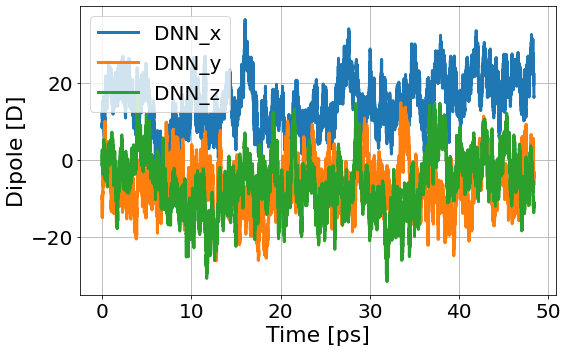

In [123]:

#
# * unit_cellの計算結果の図示
# * 一つのconfigurationをとってきて図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

cell_dipoles_pred=np.load("result_dipole_1.npy")
eps_0_tmp, time, pred_data = calc_acf("result_dipole_1.npy")
ax.plot(times[:len(cell_dipoles_pred[:,0])], cell_dipoles_pred[:,0], label="DNN_x", lw=3)  # 描画
ax.plot(times[:len(cell_dipoles_pred[:,1])], cell_dipoles_pred[:,1], label="DNN_y", lw=3)  # 描画
ax.plot(times[:len(cell_dipoles_pred[:,2])], cell_dipoles_pred[:,2], label="DNN_z", lw=3)  # 描画


# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="Time [ps]"
ylabel="Dipole [D]"

# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

# ax.set_xlim(0,3)
# ax.set_ylim(0,3)
ax.grid()

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper left",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig(load_dir+"leaning_result.png")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])

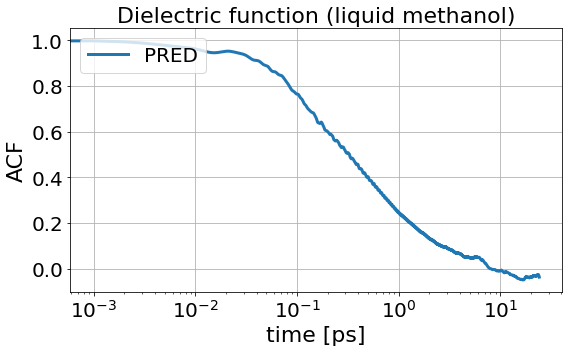

In [55]:
#
# * ACFの図示

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(time, pred_mean, label="PRED", lw=3)  # 描画

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="time [ps]"
ylabel="ACF"
title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

# ax.set_xlim(0,XMAX)
# ax.set_ylim(0,4)
ax.grid()

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )

ax.set_xscale('log')

# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper left",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("dielec_func_THz_0411.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])


In [56]:
#天野さんコード(numpy)

from calc_fourier import calc_fourier

# eps_n2 = 1.333**2
# eps_0=20
# eps_n2には屈折率の2乗を入れる？
# 液体メタノール：1.329
# https://www.shodex.com/ja/dc/06/0116.html
print(eps_0)
# eps_0= 2.056936680492596 # ? 値がこれでいいのか？
eps_n2 = 1.329**2   # eps_n2=eps_inf^2 ? (3.1) 
eps_inf = 1.0     # should be fixed 
#eps_0 = pred_eps
#data=acfs["acf"].to_numpy()

pred_mean[0]=0.5

#data =blur_array

TIMESTEP =(time[1]-time[0])  # psec.
print("TIMESTEP [fs] :: ", TIMESTEP*1000)

rfreq, ffteps1_pred, ffteps2_pred=calc_fourier(pred_mean, eps_0, eps_n2, TIMESTEP)

# convert THz to cm-1
kayser = rfreq * 33.3 

4.73161423771943
TIMESTEP [fs] ::  0.9675599999999999


In [64]:
eps_0

4.73161423771943

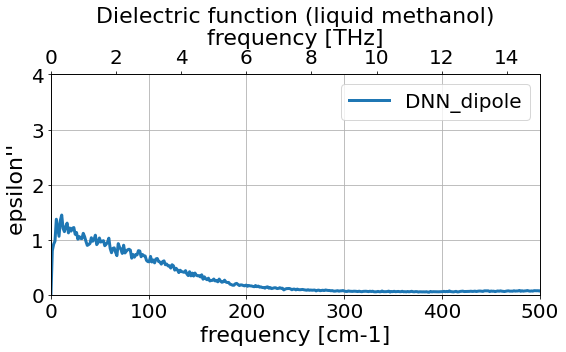

In [57]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(kayser, ffteps2_pred, label="DNN_dipole", lw=3)  # 描画

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon'' "
title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,4)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("dielec_func_THz_0411.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



In [45]:
expdata=np.loadtxt("exp_methanol_dielec.csv", delimiter=",")
expdata_re=np.loadtxt("exp_methanol_re_dielec.csv", delimiter=",")
expdata_alpha=np.loadtxt("exp_methanol_alpha.csv", delimiter=",")
expdata_n=np.loadtxt("exp_methanol_refractiveindex.csv", delimiter=",")

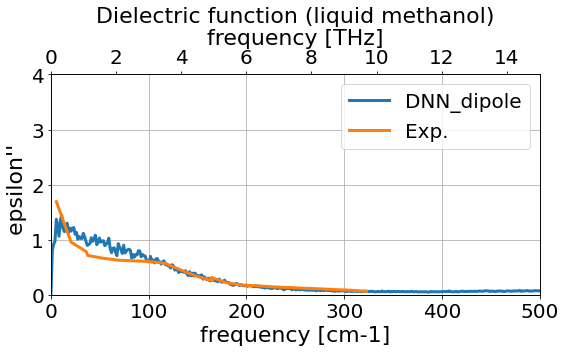

In [63]:

#
# * 誘電関数の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(kayser, ffteps2_pred, label="DNN_dipole", lw=3)  # 描画
ax.plot(expdata[:,0]*33.3,expdata[:,1],label="Exp.", lw=3)

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon'' "
title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,4)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("im_dielec_func_THz_0417.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



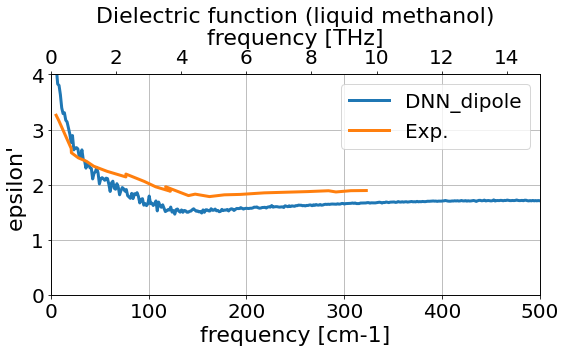

In [59]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(kayser, ffteps1_pred, label="DNN_dipole", lw=3)  # 描画
ax.plot(expdata_re[:,0]*33.3,expdata_re[:,1],label="Exp.", lw=3)

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="epsilon' "
title="Dielectric function (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,4)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("re_dielec_func_THz_0414.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



In [60]:
import cmath
epsilon= ffteps1_pred+1j*ffteps2_pred
refractive_index=[]
re_refractive_index=[]
im_refractive_index=[]

for i in epsilon:
    a,b = cmath.polar(i)
    refractive_index.append(cmath.rect(np.sqrt(a),b/2))


re_refractive_index = [a.real for a in refractive_index ] 
im_refractive_index = [a.imag for a in refractive_index ]  
    

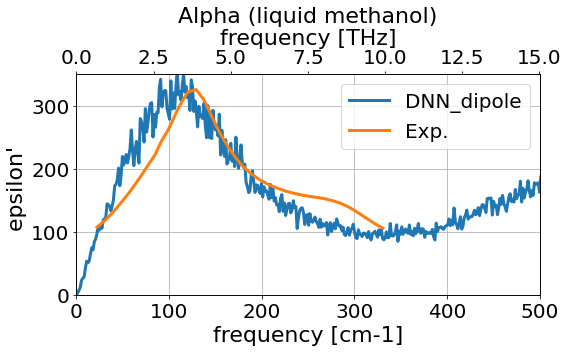

In [61]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

test = [2*a*b for a,b in zip(re_refractive_index,im_refractive_index)]

ax.plot(kayser, im_refractive_index*kayser/33.3*400*3.14/3, label="DNN_dipole", lw=3)  # 描画
ax.plot(expdata_alpha[:,0]*33.3, expdata_alpha[:,1], label="Exp.", lw=3)  # 描画

# ax.plot(expdata_re[:,0]*33.3,expdata_re[:,1],label="Exp.", lw=3)

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="Alpha [cm-1] "
title="Alpha (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
ax.set_ylim(0,350)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("alpha_THz_0414.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])



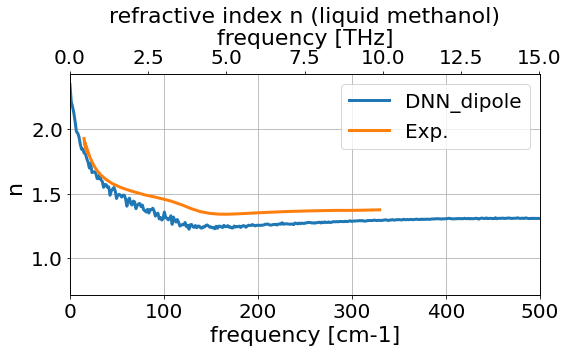

In [62]:

#
# * unit_cellの計算結果の図示
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

test = [2*a*b for a,b in zip(re_refractive_index,im_refractive_index)]

ax.plot(kayser, re_refractive_index, label="DNN_dipole", lw=3)  # 描画
ax.plot(expdata_n[:,0]*33.3, expdata_n[:,1], label="Exp.", lw=3)  # 描画

# ax.plot(expdata_re[:,0]*33.3,expdata_re[:,1],label="Exp.", lw=3)

# 各要素で設定したい文字列の取得
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
xlabel="frequency [cm-1]"
ylabel="n "
title="refractive index n (liquid methanol)"


# 各要素の設定を行うsetコマンド
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)

ax.set_title(title,fontsize=22 )

XMAX=500

ax.set_xlim(0,XMAX)
# ax.set_ylim(0,350)
ax.grid()

# 2軸目（twinyを使い、y軸を共通にして同じグラフを書く）
ax2 = ax.twiny()
ax2.set_xlim(0,XMAX/33.3)
## ax2.plot(kayser/33.3, ffteps2_pred)
ax2.set_xlabel('frequency [THz]', fontsize=22)

ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
ax2.tick_params(axis='x', labelsize=20 )


# ax.legend = ax.legend(*scatter.legend_elements(prop="colors"),loc="upper left", title="Ranking")

lgnd=ax.legend(loc="upper right",fontsize=20)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[0]._alpha = [1.0]


#pyplot.savefig("eps_real2.pdf",transparent=True)
# plt.show()
# fig.savefig("n_THz_0414.pdf")
# ax.show()
# fig.delaxes(ax)

# plt.legend()
# plt.show()

# comp.plot(x="time",y=["mu_tot_x_pred","mu_tot_x_cpmd"])

